## Урок 2. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# К признаку стажа добавим новые признаки
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [3]:
w = np.linalg.inv(X @ X.T) @ X @ y
w[1:] # 21.86576833,  4.56617094,  5.2704732

array([2.18657683e+00, 2.94591674e-03, 5.27047320e+00])

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm[1]

array([0.1, 0.1, 0.2, 0.1, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm[2]

array([0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
       0.22580645, 0.67741935, 1.        , 0.        , 0.35483871])

### Стандартизация

In [9]:
X_st = X.copy().astype(np.float64)

X_st[1] = (X[1] - X[1].mean()) / X[1].std()
X_st[1]

array([-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
       -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571])

In [10]:
X_st[1].mean(), X_st[1].std()

(3.3306690738754695e-17, 1.0)

In [11]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [12]:
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])
print(X_st[2])
print(X_st[3])

[-0.97958969 -0.56713087 -0.46401617 -0.77336028  0.97958969 -0.36090146
  1.08270439  2.11385144 -1.08270439  0.05155735]
[-0.89625816 -0.89625816  0.38411064 -0.89625816  0.38411064 -0.89625816
  1.66447944  1.66447944 -0.89625816  0.38411064]


### Стохастический градиентный спуск (SGD)

In [13]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [14]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [15]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

# Домашние задания

#### Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).


In [16]:
%matplotlib inline
from pylab import rcParams
rcParams["figure.figsize"] = 5, 3
%config InlineBackend.figure_format = 'svg'
import sympy
sympy.init_printing()

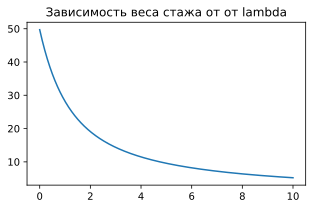

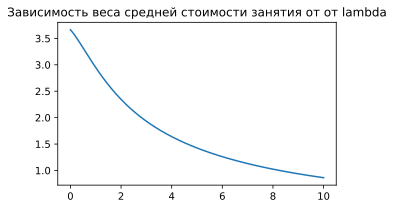

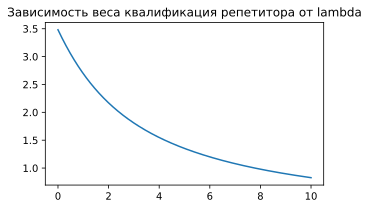

In [17]:
lambda_space = np.linspace(1e-10, 10, 500)
v_y = np.zeros(len(lambda_space))
v_x1 = np.zeros(len(lambda_space))
v_x2 = np.zeros(len(lambda_space))
v_x3 = np.zeros(len(lambda_space))

for n in range(0,len(lambda_space)):
    v_y[n] = lambda_space[n]
    v_x1[n] = eval_model_reg2(X_st, y, iterations=1000, alpha=1e-3, lambda_=lambda_space[n])[0]
    v_x2[n] = eval_model_reg2(X_st, y, iterations=1000, alpha=1e-3, lambda_=lambda_space[n])[1]
    v_x3[n] = eval_model_reg2(X_st, y, iterations=1000, alpha=1e-3, lambda_=lambda_space[n])[2]    
    
    plt.title('Зависимость веса стажа от от lambda')
plt.plot(v_y, v_x1)
plt.show()

plt.title('Зависимость веса средней стоимости занятия от от lambda')
plt.plot(v_y, v_x2)
plt.show()

plt.title('Зависимость веса квалификация репетитора от lambda')
plt.plot(v_y, v_x3)
plt.show()

#### Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Думаю, что в этом нет смысла т.к. результат будет такой же как если бы мы применили только стандартизацию.

#### *Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [18]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        w_min = np.zeros(len(W))
        for n, el in enumerate(W):
            if el > 0:
                w_min[n] = 1
            elif el < 0:
                w_min[n] = -1
            else:
                w_min[n] = 0
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * w_min) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [19]:
eval_model_reg1(X_st, y, iterations=1000, alpha=1e-3, lambda_=0.01)

100 [28.24928708  2.78377572  3.24212291  4.12386775] 904.5563598617671
200 [42.4661635   3.408882    3.53724259  4.46429141] 267.09408492785485
300 [49.74907653  3.66451702  3.4813387   4.46114646] 100.17798738543289
400 [53.47991168  3.85081241  3.37645742  4.4111573 ] 56.2818930683545
500 [55.39111546  4.01529092  3.26918959  4.35970499] 44.67400038209037
600 [56.37017236  4.16619724  3.16649668  4.31323107] 41.55226896523281
700 [56.87171616  4.30560984  3.0692029   4.27219294] 40.668386124177474
800 [57.12864319  4.43458527  2.97719206  4.23617244] 40.38085328394431
900 [57.26025981  4.55396191  2.89021367  4.20466354] 40.25748430005537
1000 [57.32768337  4.66448974  2.80800755  4.17719008] 40.183714536838735


array([57.32768337,  4.66448974,  2.80800755,  4.17719008])